In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import pprint

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path= Path("lending_data.csv")
df_lending_data= pd.read_csv(file_path)

# Review the DataFrame
df_lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_lending_data['loan_status']

# Separate the X variable, the features
X = df_lending_data.drop('loan_status', axis=1)

In [4]:
# Review the y variable Series
print((y).head(5))

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64


In [5]:
# Review the X variable DataFrame
X[:5]

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
print(y.value_counts())

loan_status
0    75036
1     2500
Name: count, dtype: int64


### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
#note: x = the independent variables in the dataset used, y= is the target, the outcome we want to predict
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
y_train.value_counts()

loan_status
0    56271
1     1881
Name: count, dtype: int64

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model=logistic_regression_model.fit(X_train, y_train)
lr_model

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
y_pred = lr_model.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Balanced Accuracy Score:", balanced_accuracy)
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Balanced Accuracy Score: 0.9520479254722232
Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [11]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

testing_predictions = lr_model.predict(X_test)

testing_matrix = confusion_matrix(y_test, testing_predictions)
print(testing_matrix)

#True positive (18663), False positive (102), False negative (56), True negative (563)

[[18663   102]
 [   56   563]]


In [12]:
# Print the classification report for the model 
testing_report = classification_report(y_test, testing_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [13]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Generate the classification report
testing_report = classification_report(y_test, testing_predictions)

# Convert the classification report to a list of lists
report_data = []
lines = testing_report.split('\n')
for line in lines[2:-5]:
    row = line.strip().split()
    # Update class labels
    if row:
        if row[0] == '0':
            row[0] = 'Healthy Loan'
        elif row[0] == '1':
            row[0] = 'High-Risk Loan'
    report_data.append(row)

# Print the classification report as a table
table_headers = ['Class Model 1', 'Precision', 'Recall', 'F1-Score', 'Support']
table = tabulate(report_data, headers=table_headers, tablefmt='grid')
print(table)

# Save the table to a file
with open('classification_report.txt', 'w') as file:
    file.write(table)


+-----------------+-------------+----------+------------+-----------+
| Class Model 1   |   Precision |   Recall |   F1-Score |   Support |
+=================+=============+==========+============+===========+
| Healthy Loan    |        1    |     0.99 |       1    |     18765 |
+-----------------+-------------+----------+------------+-----------+
| High-Risk Loan  |        0.85 |     0.91 |       0.88 |       619 |
+-----------------+-------------+----------+------------+-----------+


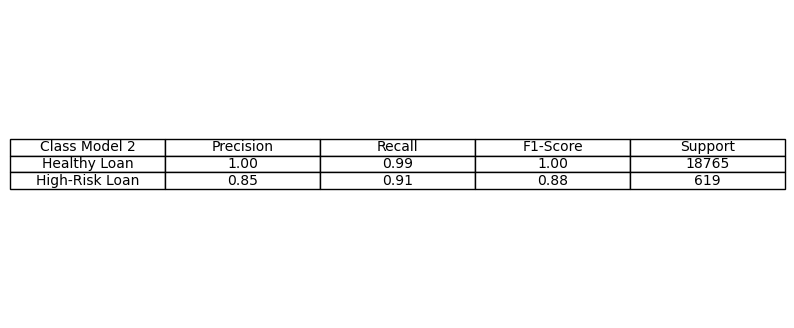

In [22]:
import matplotlib.pyplot as plt
from PIL import Image

# Generate the classification report table as a matplotlib table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
table = ax.table(cellText=report_data, colLabels=table_headers, loc='center', cellLoc='center')

# Save the table as a PNG image
plt.savefig('classification_report.png', bbox_inches='tight')


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
Model precision: the precision (which measures the accuracy of positive predictions made by the model, in other words, number of correct positive predictions), shows that for healthy loans, (0), the model accuracy is very high - 100%. For high-risk loans the model accuracy is 85%. This means that the model has a very low rate of false positives for the healthy loans (basically 100% accuracy), but it is not 100% accurate in identifying all the false positives for the high-risk loans.

Model recall: which is the true positive rate for the total number of positive predictions. For health loans,(0), it can predict 99% of positive and for unhealthy 91% of total positive, meaning, that the model has a low rate of false negatives for healthy loans, and a very fairly rate for high-risk loans; although it cannot predict all the false negatives for the high-risk loans.

F1 = which is the mean of the precision and recall and considers both the false positives (precision) and false negatives (recall).

In general, the model is highly efficient in predicting the healthy loans and has a moderate to high precision to predict the high-risk loans, but still a very accurate model.



---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [14]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = random_oversampler.fit_resample(X_train, y_train)

In [15]:
# Count the distinct values of the resampled labels data
#The zip() function is used to iterate over two arrays simultaneously, it combines the unique labels (unique_counts[0]) and their corresponding counts (unique_counts[1]). 

unique_counts = np.unique(y_train_resampled, return_counts=True)
for label, count in zip(unique_counts[0], unique_counts[1]):
    print(f"Label {label}: {count} occurrences")


Label 0: 56271 occurrences
Label 1: 56271 occurrences


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [16]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model_2 = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
l_r_r= logistic_regression_model_2.fit(X_train_resampled, y_train_resampled)

# Make a prediction using the testing data
y_pred_r = l_r_r.predict(X_test)
pd.DataFrame({"Prediction": y_pred_r, "Actual": y_test}).head(5)

,Prediction,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Print the balanced_accuracy score of the model 
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_r)
print("Balanced Accuracy Score:", balanced_accuracy)
print(f"Training Data Score: {l_r_r.score(X_train_resampled, y_train_resampled)}")
print(f"Testing Data Score: {l_r_r.score(X_test, y_test)}")

Balanced Accuracy Score: 0.9936781215845847
Training Data Score: 0.9947308560359688
Testing Data Score: 0.9938093272802311


In [18]:
# Generate a confusion matrix for the model

testing_matrix_r = confusion_matrix(y_test, y_pred_r)
print(testing_matrix_r)


[[18649   116]
 [    4   615]]


In [19]:
# Print the classification report for the model
testing_report_r = classification_report(y_test, y_pred_r)
print(testing_report_r) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



In [20]:
# Generate the classification report
testing_report_r = classification_report(y_test, testing_predictions)

# Convert the classification report to a list of lists
report_data = []
lines = testing_report_r.split('\n')
for line in lines[2:-5]:
    row = line.strip().split()
    # Update class labels
    if row:
        if row[0] == '0':
            row[0] = 'Healthy Loan'
        elif row[0] == '1':
            row[0] = 'High-Risk Loan'
    report_data.append(row)

# Print the classification report as a table
table_headers = ['Class Model 2', 'Precision', 'Recall', 'F1-Score', 'Support']
table = tabulate(report_data, headers=table_headers, tablefmt='grid')
print(table)

# Save the table to a file
with open('classification_report2.txt', 'w') as file:
    file.write(table)

+-----------------+-------------+----------+------------+-----------+
| Class Model 2   |   Precision |   Recall |   F1-Score |   Support |
+=================+=============+==========+============+===========+
| Healthy Loan    |        1    |     0.99 |       1    |     18765 |
+-----------------+-------------+----------+------------+-----------+
| High-Risk Loan  |        0.85 |     0.91 |       0.88 |       619 |
+-----------------+-------------+----------+------------+-----------+


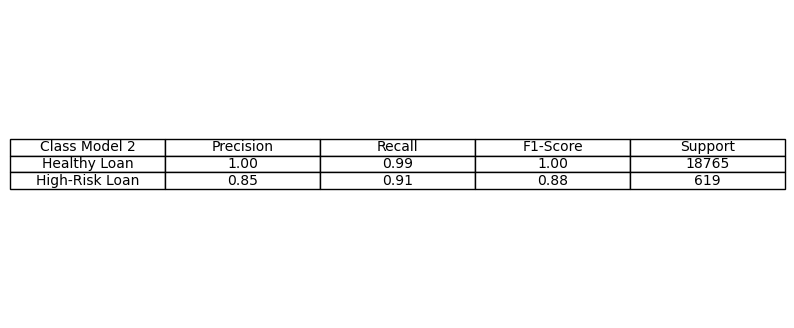

In [23]:
# Generate the classification report table as a matplotlib table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
table = ax.table(cellText=report_data, colLabels=table_headers, loc='center', cellLoc='center')

# Save the table as a PNG image
plt.savefig('classification_report2.png', bbox_inches='tight')


### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
Model precision: the precision (which measures the accuracy of positive predictions made by the model, in other words, number of correct positive predictions), shows that the model accuracy is very high - 100% for both healthy and a moderate accuracy of 84% for high-risk loans. This means that the model has a very low rate of false positives for healthy loans, but a moderate rate for high-risk loans.

Model recall: which is the true positive rate for the total number of positive predictions. The model predict 99% of total positive, meaning, that the model has a low rate of false negatives for both healthy and high-risk loans.

F1 = which is the mean of the precision and recall and considers both the false positives (precision) and false negatives (recall).

In general, the logistic regression model 2 is highly efficient in predicting the healthy and high-risk loans with a balance accuracy of 99% versus the  balance accuracy of 95% calculated under model 1.